<a href="https://colab.research.google.com/github/IAMLATI/Demo-Repo2/blob/master/Simple_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
warnings.filterwarnings('ignore')
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score
%matplotlib inline

In [2]:
df=pd.read_csv('/content/SOCR-HeightWeight.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Index           25000 non-null  int64  
 1   Height(Inches)  25000 non-null  float64
 2   Weight(Pounds)  25000 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 586.1 KB


In [4]:
df.head()

,Index,Height(Inches),Weight(Pounds)
0,1,65.78331,112.9925
1,2,71.51521,136.4873
2,3,69.39874,153.0269
3,4,68.21660,142.3354
4,5,67.78781,144.2971


Text(0, 0.5, 'Weight(Pounds')

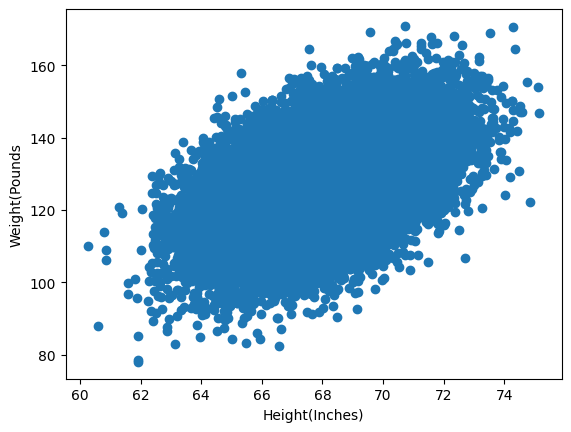

In [5]:
plt.scatter(df['Height(Inches)'],df['Weight(Pounds)'])
plt.xlabel('Height(Inches)')
plt.ylabel('Weight(Pounds')

In [6]:
df.shape

(25000, 3)

In [7]:
df_copy=df.copy()

In [8]:
X=df_copy[['Height(Inches)']] #independent features
Y=df_copy[['Weight(Pounds)']] #dependent features

In [9]:
Y

,Weight(Pounds)
0,112.9925
1,136.4873
2,153.0269
3,142.3354
4,144.2971
...,...
24995,118.0312
24996,120.1932
24997,118.2655
24998,132.2682


In [10]:
x_train, x_test, y_train, y_test= train_test_split(X,Y, test_size=0.20, random_state=42)

In [11]:
X.shape

(25000, 1)

In [12]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((20000, 1), (5000, 1), (20000, 1), (5000, 1))

In [13]:
scaler=StandardScaler()

In [14]:
x_train=scaler.fit_transform(x_train)

In [17]:
x_test=scaler.transform(x_test)

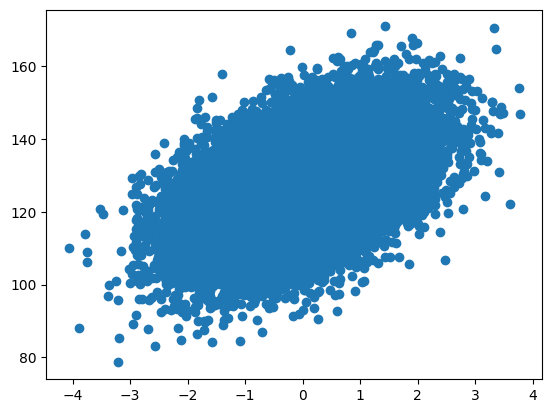

In [18]:
plt.scatter(x_train, y_train)

In [20]:
regressor =LinearRegression()

In [21]:
regressor.fit(x_train,y_train)

LinearRegression()

In [24]:
print('The slope or coefficient of weight is' ,regressor.coef_)
print('Intercept' ,regressor.intercept_)

The slope or coefficient of weight is [[5.82644432]]
Intercept [127.07814619]


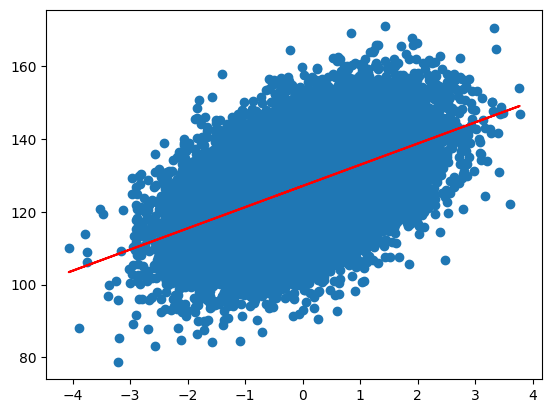

In [32]:
plt.scatter(x_train, y_train)
plt.plot(x_train, regressor.predict(x_train), color='red')

In [33]:
y_pred_test=regressor.predict(x_test)

In [36]:
[[y_pred_test, y_test]]

[[array([[-191.43730844],
         [-191.88775004],
         [-192.09034806],
         ...,
         [-191.31228154],
         [-192.57130608],
         [-189.60656169]]),
         Weight(Pounds)
  6868         134.2855
  24016        111.9666
  9668         135.9871
  13640        126.3802
  14018        100.1810
  ...               ...
  8670         138.0941
  11839        105.2101
  4013         141.1859
  21147        129.5261
  695          134.7527
  
  [5000 rows x 1 columns]]]

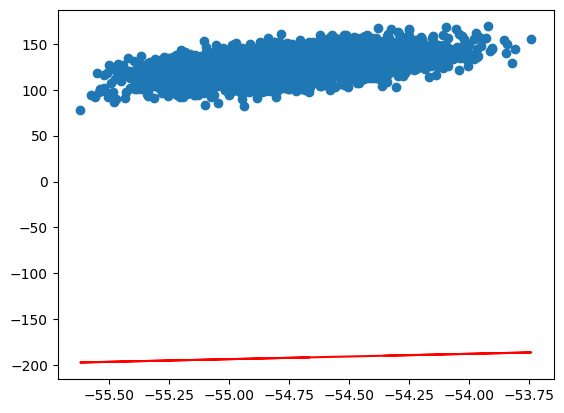

In [40]:
plt.scatter(x_test,y_test)
plt.plot(x_test, regressor.predict(x_test),'r')

In [45]:
mse=mean_squared_error(y_test,y_pred_test)
mae=mean_absolute_error(y_test,y_pred_test)
mae=np.sqrt(mse)
R_SCORE=r2_score(y_test,y_pred_test)
print(mse)
print(mae)
print(mae)
print(R_SCORE)

101806.36052302949
319.07109007716366
319.07109007716366
-733.4917633400223


In [46]:
scaled_weight=scaler.transform([[80]])
scaled_weight

array([[6.33054917]])

In [50]:
regressor.predict([scaled_weight[0]])

array([[163.96273846]])

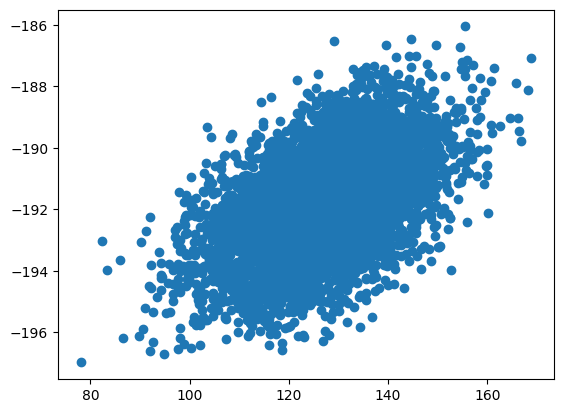

In [51]:
plt.scatter(y_test, y_pred_test)

In [53]:
residuals=y_test- y_pred_test
residuals

,Weight(Pounds)
6868,325.722808
24016,303.854350
9668,328.077448
13640,317.315284
14018,291.118167
...,...
8670,329.094655
11839,297.619889
4013,332.498182
21147,322.097406


<Axes: ylabel='Density'>

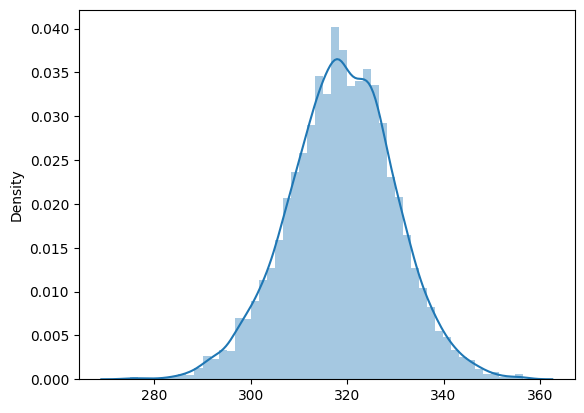

In [56]:
sns.distplot(residuals, kde=True)